<a href="https://colab.research.google.com/github/Ebadi-Fereshteh/Deep-Learning/blob/main/Compare%20MLP%20vs%20CNN/cifar100/cifar100_mlp_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
wandb.init(project= "MLP cifar100")

In [ ]:
config = wandb.config
config.learning_rate = 0.001


In [ ]:
(X_train, Y_train),(X_test, Y_test) = tf.keras.datasets.cifar10.load_data()


In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0 , X_test / 255.0

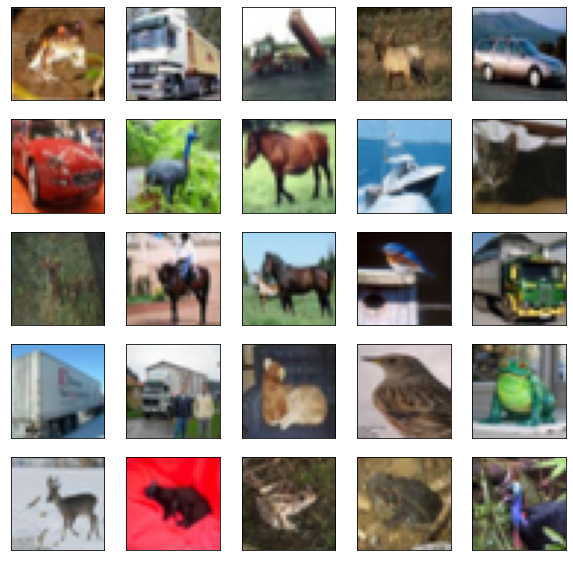

In [ ]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              #  'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    # plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, shuffle=True)

### MLP Model

In [ ]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
       Dense(512, activation="relu"),
       Dense(128, activation="relu"),
       Dense(64, activation="relu"),
       Dense(32, activation="relu"),
       Dense(100, activation="softmax")                                     
])

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

## Train

In [ ]:
model_history = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/10
1172/1172 [==============================] - 11s 7ms/step - loss: 1.9641 - accuracy: 0.2934 - val_loss: 1.7909 - val_accuracy: 0.3439 - _timestamp: 1648305348.0000 - _runtime: 30.0000
Epoch 2/10
1172/1172 [==============================] - 8s 7ms/step - loss: 1.7520 - accuracy: 0.3700 - val_loss: 1.8767 - val_accuracy: 0.3358 - _timestamp: 1648305356.0000 - _runtime: 38.0000
Epoch 3/10
1172/1172 [==============================] - 8s 6ms/step - loss: 1.6768 - accuracy: 0.3998 - val_loss: 1.6515 - val_accuracy: 0.4051 - _timestamp: 1648305364.0000 - _runtime: 46.0000
Epoch 4/10
1172/1172 [==============================] - 8s 6ms/step - loss: 1.6132 - accuracy: 0.4223 - val_loss: 1.6055 - val_accuracy: 0.4213 - _timestamp: 1648305371.0000 - _runtime: 53.0000
Epoch 5/10
1172/1172 [==============================] - 7s 6ms/step - loss: 1.5663 - accuracy: 0.4402 - val_loss: 1.6317 - val_accuracy: 0.4086 - _timestamp: 1648305379.0000 - _runtime: 61.0000
Epoch 6/10
1172/1172 [=======

## Test

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4668 - accuracy: 0.4828


[1.4667540788650513, 0.4828000068664551]

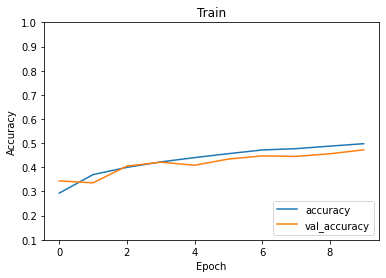

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')


In [ ]:
model.save('mlp-cifar100.h5')

## CNN Model

In [ ]:
model = tf.keras.models.Sequential([
      layers.Conv2D(32, (3, 3), input_shape=(32,32, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      # layers.Conv2D(128, (3, 3), activation='relu'),
      # layers.MaxPooling2D(),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.Conv2D(64, (3, 3), activation='relu'),
      # layers.MaxPooling2D(),
      # layers.Conv2D(16, (3, 3), activation='relu'),
      layers.Flatten(),   
      Dense(512, activation="relu"),
      Dense(128, activation="relu"),
      Dense(64, activation="relu"),
      #  Dense(32, activation="relu"),
      Dense(100, activation="softmax") 
])


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )


In [ ]:
model_history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/10
1172/1172 [==============================] - 21s 11ms/step - loss: 1.7826 - accuracy: 0.3402 - val_loss: 1.4585 - val_accuracy: 0.4614 - _timestamp: 1648306133.0000 - _runtime: 815.0000
Epoch 2/10
1172/1172 [==============================] - 14s 12ms/step - loss: 1.3150 - accuracy: 0.5245 - val_loss: 1.3401 - val_accuracy: 0.5335 - _timestamp: 1648306147.0000 - _runtime: 829.0000
Epoch 3/10
1172/1172 [==============================] - 14s 12ms/step - loss: 1.1712 - accuracy: 0.5809 - val_loss: 1.1350 - val_accuracy: 0.5990 - _timestamp: 1648306160.0000 - _runtime: 842.0000
Epoch 4/10
1172/1172 [==============================] - 13s 11ms/step - loss: 1.0454 - accuracy: 0.6286 - val_loss: 1.0705 - val_accuracy: 0.6224 - _timestamp: 1648306173.0000 - _runtime: 855.0000
Epoch 5/10
1172/1172 [==============================] - 13s 11ms/step - loss: 0.9554 - accuracy: 0.6643 - val_loss: 1.1049 - val_accuracy: 0.6210 - _timestamp: 1648306186.0000 - _runtime: 868.0000
Epoch 6/10
1172

In [ ]:
test_loss, test_acc= model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9408 - accuracy: 0.6912


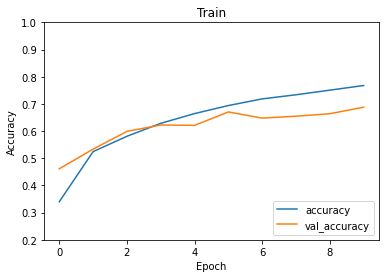

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')



In [ ]:
model.save('cnn-mlp-cifar100.h5')